# New Section

In [ ]:
!pip install simplejson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 3.3 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries
import urllib.request
import shutil

# Set the URL of the file to download
url = "http://snap.stanford.edu/data/amazon/Electronics.txt.gz"

# Set the local file path to save the downloaded file
local_file_path = "/content/Electronics.txt.gz"

# Download the file from the URL and save it to the local file path
with urllib.request.urlopen(url) as response, open(local_file_path, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)


In [ ]:
import gzip
import simplejson
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [ ]:
with gzip.open('/content/Electronics.txt.gz', 'rt') as file:
    lines = file.readlines()

In [ ]:
lines

['product/productId: B0000630MQ\n',
 'product/title: Kodak Max K2000 Battery Charger with 4 NiMH AA Batteries\n',
 'product/price: unknown\n',
 'review/userId: A2F6FARSB1VL6Q\n',
 'review/profileName: "frumpy16"\n',
 'review/helpfulness: 2/2\n',
 'review/score: 5.0\n',
 'review/time: 1072915200\n',
 'review/summary: Great charger\n',
 'review/text: I recently bought this charger kit from Amazon and I am quite happy with my purchase. The folding plug is nice for storage. The included 1850 mAh batteries last for a long time in my Nikon Coolpix 2100. One of the best features of the charger is that each battery is charged separately (as opposed to in pairs) so that each battery gets just the right amount of charge. The short 3 hour charge time is great as well. The batteries do not get overly warm while charging either.Overall, this is a good charger for a good price. If you have a high drain device, the Kodak K2000 should keep you playing for a long time.\n',
 '\n',
 'product/productId: B

In [ ]:
data = [{}]
for line in lines:
    if line.startswith('product/') or line.startswith('review/'):
        key, value = line.strip().split(':', 1)  # split on the first colon only
        data[-1][key] = value.strip()
    else:
        data.append({})

In [ ]:
df = pd.DataFrame(data)
df

product/productId                                      product/title  \
0              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
1              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
2              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
3              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
4              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
...                   ...                                                ...   
1241774        B000051JUL                          3Com Audrey Web Appliance   
1241775        B000051JUL                          3Com Audrey Web Appliance   
1241776        B000063W56  Sony ACCCSP Starter Kit for DSCP3 & DSCP5 Digi...   
1241777        B000063W56  Sony ACCCSP Starter Kit for DSCP3 & DSCP5 Digi...   
1241778               NaN                                                NaN   

        product/price   review/userId review/profileName review/helpfulness  \
0             unknown  A2F6FARSB1VL6Q         "frumpy16"                2/2   
1             unknown         unknown            unknown                2/2   
2             unknown  A3P56Q3XEGTBNY      Yisheng Zhang                1/1   
3             unknown         unknown            unknown                3/4   
4             unknown   AZIM9ZTGB8Q12           G. Evans                0/0   
...               ...             ...                ...                ...   
1241774       unknown         unknown            unknown                4/5   
1241775       unknown   AZ2VE6AZ4EW8Q            JMO9876                1/1   
1241776         99.20   AA2CXRGE0GN1S          Y. Hu "Y"                1/1   
1241777         99.20  A3LIWM4DA1TOOP         Y Al-Saleh                1/3   
1241778           NaN             NaN                NaN                NaN   

        review/score review/time                             review/summary  \
0                5.0  1072915200                              Great charger   
1                5.0  1058745600             Super product! I'm very happy.   
2                2.0  1127088000         Problem with charging smaller AAAs   
3                5.0  1068768000               CHECK OUT THE K6000 CHARGER!   
4                5.0  1274313600  Finally a Great recharger with batteries!   
...              ...         ...                                        ...   
1241774          1.0  1010966400    This item was discontinued in May 2001.   
1241775          1.0   985651200                          NOT user friendly   
1241776          5.0  1024963200      Case, Battery and 32 Meg Memory Stick   
1241777          5.0  1023235200                       Sony DSC Starter kit   
1241778          NaN         NaN                                        NaN   

                                               review/text  
0        I recently bought this charger kit from Amazon...  
1        The batteries are excellent (1850's), and the ...  
2        I have had the charger for more than two years...  
3        Greetings. Kodak also has a K6000 charger whic...  
4        I have used and recharged my batteries nearly ...  
...                                                    ...  
1241774  This is not a good buy! Here is a clip from th...  
1241775  We bought this for our Mom with high expectaio...  
1241776  I bought this item because I thought there was...  
1241777  This is a great kit , has all the essentials a...  
1241778                                                NaN  

[1241779 rows x 10 columns]

In [ ]:
df.isnull().sum()

product/productId     1
product/title         1
product/price         1
review/userId         1
review/profileName    1
review/helpfulness    1
review/score          1
review/time           1
review/summary        1
review/text           1
dtype: int64

In [ ]:
# drop rows with null values
df = df.dropna()

In [ ]:
df.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [ ]:
# randomly select 50,000 rows with a random state of 42
sampled_df = df.sample(n=5000, random_state=42)

# process your sampled data frame here


In [ ]:
Review=sampled_df.copy()

In [ ]:
# reset the index and delete the old index
Review = Review.reset_index(drop=True)

In [ ]:
Review.head()

product/productId                                    product/title  \
0        B00028Y826            Creative MuVo TX FM 256 MB MP3 Player   
1        B0002WPSCG                Logitech X-530 5.1 Speaker System   
2        B0002SAF3M    Logitech V500 Cordless Optical Notebook Mouse   
3        B0007QARCS  RCA CC-431 SLA Camcorder Battery from Batteries   
4        B00012FVYC                           Lowepro Rezo 30 -Black   

  product/price   review/userId       review/profileName review/helpfulness  \
0       unknown   AE9P1QX9RIRSE                   KlessS                0/0   
1       unknown  A1R4SOPHGJ4H89        Sathya Srinivasan                0/0   
2       unknown  A3MEWI6VUBHXDQ  Derick Centeno "Derick"                0/0   
3         21.13   A1LWKLQWSDUC6                Metrostar                0/0   
4         11.83  A200MI041OYY4C                 Rick_ATL                9/9   

  review/score review/time                      review/summary  \
0          5.0  1166140800                  Love these things!   
1          5.0  1178409600  Great product for a moderate price   
2          5.0  1283299200                   The superior V500   
3          5.0  1331164800                        Good Battery   
4          5.0  1287532800   Perfect For Panasonic ZS7 Camera!   

                                         review/text  
0  Ipod be damned. Does the necessaries with no f...  
1  This is a great product for a moderate price. ...  
2  The Logitech V500 is a true 3-button wireless ...  
3  Does exactly what it meant to. Very good price...  
4  This case was suggested elsewhere as a complim...

In [ ]:
# remove the specified columns
columns_to_remove = ['product/productId', 'product/title', 'product/price', 'review/userId',
                     'review/profileName', 'review/helpfulness', 'review/time', 'review/summary']
Review = Review.drop(columns=columns_to_remove)

In [ ]:
Review

review/score                                        review/text
0             5.0  Ipod be damned. Does the necessaries with no f...
1             5.0  This is a great product for a moderate price. ...
2             5.0  The Logitech V500 is a true 3-button wireless ...
3             5.0  Does exactly what it meant to. Very good price...
4             5.0  This case was suggested elsewhere as a complim...
...           ...                                                ...
4995          1.0  Cd player would not turn on. Upon close inspec...
4996          5.0  I've had great luck with this adapter, and fin...
4997          5.0  I wanted a remote to use for playing around wi...
4998          3.0  ... like the first Kingston I bought from Amaz...
4999          5.0  Large wheels make it easy to push even on carp...

[5000 rows x 2 columns]

In [ ]:
# replace decimal values in the review/score column with their corresponding integer values
Review['review/label'] = Review['review/score'].replace({'5.0': 4, '4.0': 3, '3.0': 2, '2.0': 1, '1.0': 0})

In [ ]:
Review

review/score                                        review/text  \
0             5.0  Ipod be damned. Does the necessaries with no f...   
1             5.0  This is a great product for a moderate price. ...   
2             5.0  The Logitech V500 is a true 3-button wireless ...   
3             5.0  Does exactly what it meant to. Very good price...   
4             5.0  This case was suggested elsewhere as a complim...   
...           ...                                                ...   
4995          1.0  Cd player would not turn on. Upon close inspec...   
4996          5.0  I've had great luck with this adapter, and fin...   
4997          5.0  I wanted a remote to use for playing around wi...   
4998          3.0  ... like the first Kingston I bought from Amaz...   
4999          5.0  Large wheels make it easy to push even on carp...   

      review/label  
0                4  
1                4  
2                4  
3                4  
4                4  
...            ...  
4995             0  
4996             4  
4997             4  
4998             2  
4999             4  

[5000 rows x 3 columns]

In [ ]:
Review.to_csv('Show.csv',index=False)

In [ ]:
Review['review/text'][0]

'Ipod be damned. Does the necessaries with no fuss. A bit tricky for my fat fingers, but I would never buy the Nano or Ipod over this. Yes, the volume is a tad low, and the included earbuds are weak. Durable, well designed software, good battery life, good FM tuner.'

In [ ]:
Review['review/score'].dtype

dtype('O')

In [ ]:
Review['review/score'].unique()

array(['5.0', '2.0', '3.0', '4.0', '1.0'], dtype=object)

In [ ]:
Review['review/label'].dtype

dtype('int64')

In [ ]:
Review['review/label'].unique()

array([4, 1, 2, 3, 0])

In [ ]:
# sum the unique values in the review/score column
unique_scores = Review['review/label'].unique()
total_score = sum(unique_scores)

In [ ]:
total_score

10

In [ ]:
df=Review.copy()

In [ ]:
# rename the review/score and review/text columns
df = df.rename(columns={'review/score': 'Rating', 'review/text': 'Review','review/label': 'Label'})


In [ ]:
df

Rating                                             Review  Label
0       5.0  Ipod be damned. Does the necessaries with no f...      4
1       5.0  This is a great product for a moderate price. ...      4
2       5.0  The Logitech V500 is a true 3-button wireless ...      4
3       5.0  Does exactly what it meant to. Very good price...      4
4       5.0  This case was suggested elsewhere as a complim...      4
...     ...                                                ...    ...
4995    1.0  Cd player would not turn on. Upon close inspec...      0
4996    5.0  I've had great luck with this adapter, and fin...      4
4997    5.0  I wanted a remote to use for playing around wi...      4
4998    3.0  ... like the first Kingston I bought from Amaz...      2
4999    5.0  Large wheels make it easy to push even on carp...      4

[5000 rows x 3 columns]

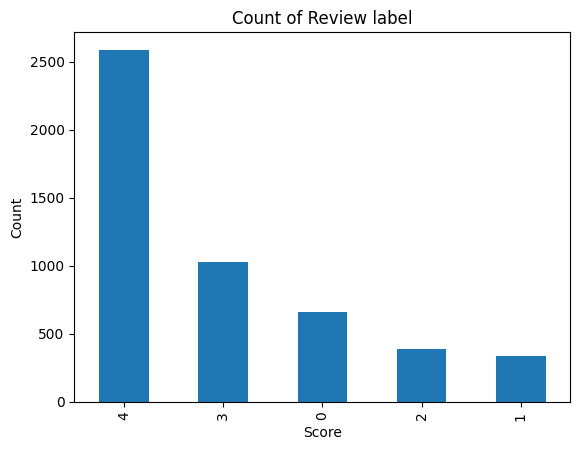

In [ ]:
# plot a bar chart of the count of each score value
df['Label'].value_counts().plot.bar()

# set the title and axis labels
plt.title('Count of Review label')
plt.xlabel('Score')
plt.ylabel('Count')

# display the plot
plt.show()

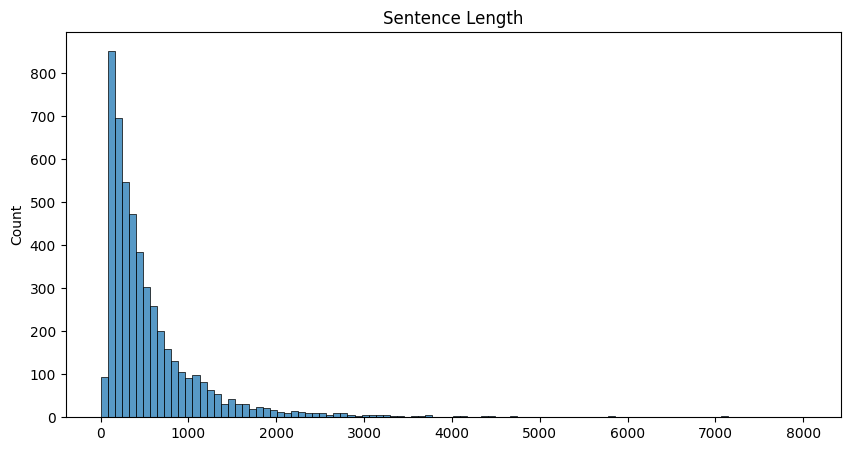

In [ ]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.Review], bins=100)
plt.title('Sentence Length')
plt.show()

In [ ]:
Review_lengths = [len(s) for s in df['Review']]
df_Review_lengths = pd.DataFrame({'Review Length': Review_lengths})
df_Review_lengths

Review Length
0               265
1               213
2              1280
3               110
4               288
...             ...
4995            298
4996            879
4997            465
4998            213
4999            184

[5000 rows x 1 columns]

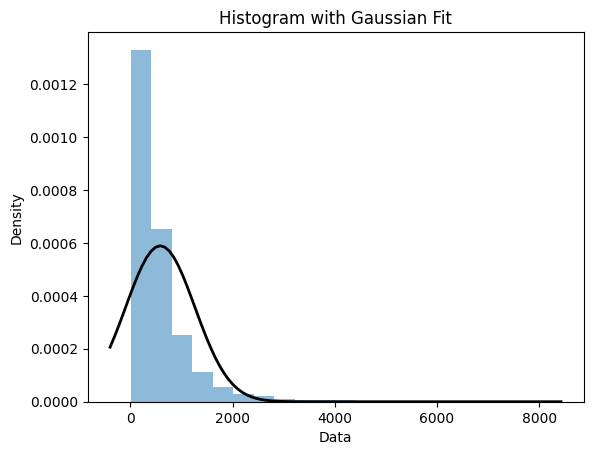

In [ ]:
# Generate random data
data = df_Review_lengths['Review Length']

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Create a histogram of the data
plt.hist(data, bins=20, density=True, alpha=0.5)

# Plot the probability density function (PDF) of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram with Gaussian Fit')

# Show plot
plt.show()

In [ ]:
# Filter the DataFrame by the length of the 'Train Review' column being less than 4000
threshold_length = 4000
Threshold_df = df[df['Review'].apply(len) < threshold_length]

Threshold_df

Rating                                             Review  Label
0       5.0  Ipod be damned. Does the necessaries with no f...      4
1       5.0  This is a great product for a moderate price. ...      4
2       5.0  The Logitech V500 is a true 3-button wireless ...      4
3       5.0  Does exactly what it meant to. Very good price...      4
4       5.0  This case was suggested elsewhere as a complim...      4
...     ...                                                ...    ...
4995    1.0  Cd player would not turn on. Upon close inspec...      0
4996    5.0  I've had great luck with this adapter, and fin...      4
4997    5.0  I wanted a remote to use for playing around wi...      4
4998    3.0  ... like the first Kingston I bought from Amaz...      2
4999    5.0  Large wheels make it easy to push even on carp...      4

[4964 rows x 3 columns]

In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(Threshold_df.Review.values, 
                                                   Threshold_df.Label.values,
                                                   test_size = 0.2,
                                                   random_state = 17,
                                                   stratify = Threshold_df.Rating.values)

In [ ]:
X_train_review_lengths = [len(s) for s in X_train]
df_train_review_lengths = pd.DataFrame({'Review Length': X_train_review_lengths})
#df_train_review_lengths

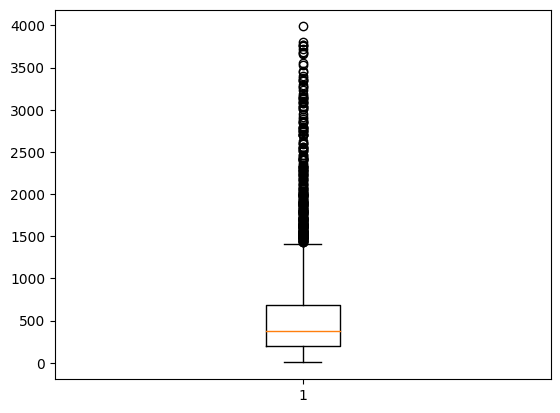

In [ ]:
# create a box plot to visualize the data
fig, ax = plt.subplots()
ax.boxplot(df_train_review_lengths['Review Length'])

# show the plot
plt.show()

In [ ]:
# Compute the mean and standard deviation of the review lengths
mean_length = np.mean(df_train_review_lengths['Review Length'])
std_length = np.std(df_train_review_lengths['Review Length'])

# Compute the 25th, 50th (median), and 75th percentiles
percentiles = np.percentile(df_train_review_lengths['Review Length'], [25, 50, 75])

print("25th percentile:", percentiles[0])
print("50th percentile (median):", percentiles[1])
print("75th percentile:", percentiles[2])

25th percentile: 196.5
50th percentile (median): 374.0
75th percentile: 687.0


In [ ]:
X_val_review_lengths = [len(s) for s in X_val]
df_valn_review_lengths = pd.DataFrame({'Review Length': X_val_review_lengths})
#df_valn_review_lengths

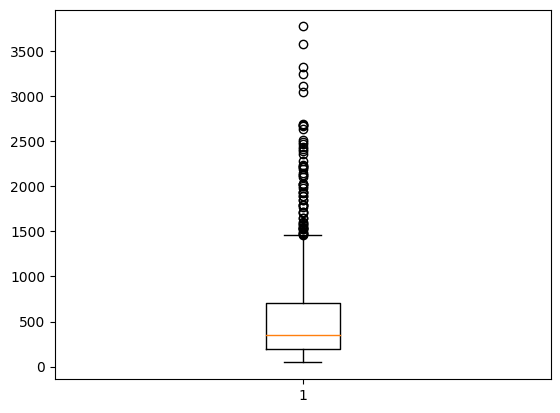

In [ ]:
# create a box plot to visualize the data
fig, ax = plt.subplots()
ax.boxplot(df_valn_review_lengths['Review Length'])

# show the plot
plt.show()

In [ ]:
review_lengths = [len(s) for s in X_val]
max_review_length = max(review_lengths)
print(f"The longest review has {max_review_length} characters.")

The longest review has 3772 characters.


In [ ]:
review_lengths = [len(s) for s in X_train]
max_review_length = max(review_lengths)
print(f"The longest review has {max_review_length} characters.")

The longest review has 3988 characters.


In [ ]:
review_lengths = [len(s) for s in X_train]
mean_length = np.mean(review_lengths)

std_length = np.std(review_lengths)
threshold = mean_length + 10 * std_length

print(f"Mean review length: {mean_length:.2f}")
print(f"Standard deviation: {std_length:.2f}")
print(f"Threshold: {threshold:.2f}")


Mean review length: 552.63
Standard deviation: 550.48
Threshold: 6057.41


In [ ]:
# Calculate the 75th percentile value of the 'Review Length' column
percentile_97_5 = np.percentile(df_valn_review_lengths['Review Length'], 97.5)

print(percentile_97_5)

2132.599999999999


In [ ]:
# Create a DataFrame with X_train and y_train
Train_df = pd.DataFrame({'Train Review': X_train, 'Train Label': y_train})

In [ ]:
Train_df

Train Review  Train Label
0     I've had these for about a month - I've never ...            3
1     I'm using these for my iPod. I was using apple...            4
2     DVI is very difficult to find the right one th...            2
3     I also get static when trying to charge and pl...            0
4     I am a weather spotter and these work great fo...            4
...                                                 ...          ...
3966  Today I received my sp350 and it only worked m...            0
3967  Don't waste money on more expensive products t...            4
3968  If this item becomes available again, and is b...            0
3969  Fits the need for which is wanted perfectly an...            4
3970  It does in fact work with Mac computers that h...            4

[3971 rows x 2 columns]

In [ ]:
# Reset the index of the filtered DataFrame and remove the old index column
Train_df = Train_df.reset_index(drop=True)

Train_df

Train Review  Train Label
0     I've had these for about a month - I've never ...            3
1     I'm using these for my iPod. I was using apple...            4
2     DVI is very difficult to find the right one th...            2
3     I also get static when trying to charge and pl...            0
4     I am a weather spotter and these work great fo...            4
...                                                 ...          ...
3966  Today I received my sp350 and it only worked m...            0
3967  Don't waste money on more expensive products t...            4
3968  If this item becomes available again, and is b...            0
3969  Fits the need for which is wanted perfectly an...            4
3970  It does in fact work with Mac computers that h...            4

[3971 rows x 2 columns]

In [ ]:
#!pip install transformers


In [ ]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
#                                          do_lower_case = True)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased',
                                         do_lower_case = True)

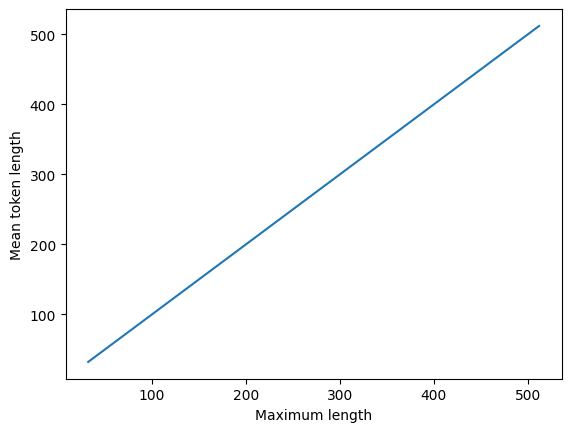

In [ ]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")
max_lengths = [32, 64, 128, 256, 512]

# Load a representative sample of your dataset
sample_texts = Train_df['Train Review'].tolist() 

# Tokenize the sample texts with different maximum lengths and compute the distribution of token lengths
token_lengths = []
for max_length in max_lengths:
    encoded_texts = tokenizer(sample_texts, max_length=max_length, padding='max_length', truncation=True)
    token_lengths.append(np.mean([len(tokens) for tokens in encoded_texts['input_ids']]))

# Plot the distribution of token lengths for each maximum length
import matplotlib.pyplot as plt

plt.plot(max_lengths, token_lengths)
plt.xlabel('Maximum length')
plt.ylabel('Mean token length')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# train_texts, val_texts, train_labels, val_labels = train_test_split(Threshold_train_df['Train Review'], 
#                                                                     Threshold_train_df['Rating'], 
#                                                                     test_size=0.2, 
#                                                                     random_state=42)

# Encode training set
encoded_data_train = tokenizer.batch_encode_plus(X_train.tolist(),
                                                add_special_tokens=True,
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                max_length=256,
                                                return_tensors='pt')

# Encode validation set
encoded_data_val = tokenizer.batch_encode_plus(X_val.tolist(),
                                              add_special_tokens=True,
                                              return_attention_mask=True,
                                              pad_to_max_length=True,
                                              max_length=256,
                                              return_tensors='pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
encoded_data_train

{'input_ids': tensor([[  101,  1045,  1005,  ...,     0,     0,     0],
        [  101,  1045,  1005,  ...,  1012,  2044,   102],
        [  101,  1040,  5737,  ...,     0,     0,     0],
        ...,
        [  101,  2065,  2023,  ...,     0,     0,     0],
        [  101, 16142,  1996,  ...,     0,     0,     0],
        [  101,  2009,  2515,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
#encode train set
import torch
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']

In [ ]:

labels_train = torch.tensor(y_train)

In [ ]:
labels_train

tensor([3, 4, 2,  ..., 0, 4, 4])

In [ ]:
labels_train.shape

torch.Size([3971])

In [ ]:
# length = len(labels_train)
# print("Length of labels_train: ", length)

In [ ]:
# for i, label in enumerate(labels_train):
#     print("Index {}: {}".format(i, label))

In [ ]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(y_val)

In [ ]:
labels_val.shape

torch.Size([993])

In [ ]:
# length = len(labels_val)
# print("Length of labels_val: ", length)

In [ ]:
# for i, label in enumerate(labels_val):
#     print("Index {}: {}".format(i, label))

In [ ]:
input_ids_train

tensor([[  101,  1045,  1005,  ...,     0,     0,     0],
        [  101,  1045,  1005,  ...,  1012,  2044,   102],
        [  101,  1040,  5737,  ...,     0,     0,     0],
        ...,
        [  101,  2065,  2023,  ...,     0,     0,     0],
        [  101, 16142,  1996,  ...,     0,     0,     0],
        [  101,  2009,  2515,  ...,     0,     0,     0]])

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [ ]:
print(len(dataset_train))
print(len(dataset_val))

3971
993


In [ ]:
dataset_train.tensors

(tensor([[  101,  1045,  1005,  ...,     0,     0,     0],
         [  101,  1045,  1005,  ...,  1012,  2044,   102],
         [  101,  1040,  5737,  ...,     0,     0,     0],
         ...,
         [  101,  2065,  2023,  ...,     0,     0,     0],
         [  101, 16142,  1996,  ...,     0,     0,     0],
         [  101,  2009,  2515,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([3, 4, 2,  ..., 0, 4, 4]))

In [ ]:
label_dict={'5.0': 4, '2.0': 1, '3.0': 2, '4.0': 3, '1.0': 0}

In [ ]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-large-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

In [ ]:
#model summary
model.config

BertConfig {
  "_name_or_path": "bert-large-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 2

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [ ]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    import os

    if not os.path.exists('Models'):
        os.makedirs('Models')

    torch.save(model.state_dict(), f'Models/BERT_ft_epoch{epoch}.model')

    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/993 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.0392992428887526


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 0.841821666341275
F1 Score (weighted): 0.6202877114108996


Epoch 2:   0%|          | 0/993 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.7312405122123276


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 0.9077813569456339
F1 Score (weighted): 0.6670455641569484


In [ ]:
import torch

# Assuming that 'model' is the reference to the trained model object
# Save the trained model to a file named 'model.pt'
torch.save(model.state_dict(), 'model.pt')


In [ ]:
#save the model to be reutilize easily
model.save('final.h5')

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: 1.0
Accuracy:92/131

Class: 2.0
Accuracy:22/67

Class: 3.0
Accuracy:13/77

Class: 4.0
Accuracy:93/204

Class: 5.0
Accuracy:456/514

